In [2]:
#Import required modules
import re #regular expressions for data cleaning
import string
from igraph import * #import igraph module
from itertools import permutations
from tqdm import tqdm
import matplotlib.pyplot as plt

%matplotlib inline

## Part 1 Question 1

In [3]:
files = ["actor_movies.txt", "actress_movies.txt"]


actor_actress_dict = {}
movies_dict = {}
unique_movies = set()
for file in files:
    with open(file, "rb") as f:
        for line in f.readlines():
            if line.count(b"\t\t") < 10:
                continue #skip if the number of movies is less than 10
            line = line.strip()
            
            
            
            split_line = line.split(b"\t\t") #split based on \t\t
            
            actor_actress = (split_line[0]) #get actor/actress
            actor_actress = actor_actress.decode('utf-8', 'ignore')
            movies = split_line[1:] #get the movies in that line
            
            movies = map(lambda x: re.sub(r'\([^1-9]+\)|\{.*\}|', "", x.decode('utf-8','ignore').strip()), movies)
            if actor_actress not in actor_actress_dict:
                actor_actress_dict[str(actor_actress)] = set()
                for movie in movies:
                    
                    #movie = movie.decode('utf-8', 'ignore')
                    movie = movie.strip()
                    if movie not in movies_dict:
                        movies_dict[movie] = set()
                        movies_dict[movie].add(actor_actress)
                    else:
                        movies_dict[movie].add(actor_actress)
                    unique_movies.add(movie)
                    actor_actress_dict[str(actor_actress)].add(movie)
            else:
                for movie in movies:
                    movie = movie.strip()
                    if movie not in movies_dict:
                        movies_dict[movie] = set()
                        movies_dict[movie].add(actor_actress)
                    else:
                        movies_dict[movie].add(actor_actress)
                    unique_movies.add(movie)
                    actor_actress_dict[str(actor_actress)].add(movie)

In [3]:
actor_actress_dict

{'$hort, Too': {'American Pimp (1999)',
  'Beats, Rhymes & Life: The Travels of a Tribe Called Quest (2011)',
  'Gangsta Rap: The Glockumentary (2007)',
  'Ghetto Physics (2010)',
  'Mac Dre: Legend of the Bay (2014)',
  'Menace II Society (1993)',
  'Pimpalation: Return of the Trill (2006)',
  'Porndogs: The Adventures of Sadie (2009)',
  'Rhyme & Reason (1997)',
  'Stop Pepper Palmer (2014)',
  'Townbiz (2010)',
  'Uprising: Hip Hop and the LA Riots (2012)'},
 '2 Live Crew': {'2 Live Crew Feat. Ice-T: The Real One (1998)',
  '2 Live Crew Feat. KC of KC & the Sunshine Band and Freak Nasty: 2 Live Party (1998)',
  "2 Live Crew: C'mon Babe (1990)",
  '2 Live Crew: Do Wah Diddy Diddy (1988)',
  '2 Live Crew: Do the Damn Thing (1996)',
  '2 Live Crew: Hoochie Mama (1995)',
  '2 Live Crew: Me So Horny (1989)',
  "2 Live Crew: Move Somethin' (1988)",
  '2 Live Crew: Pop the Pussy (1991)',
  "2 Live Crew: Shake a Lil Somethin' (1996)",
  '2 Live Crew: Take It Off (2014)',
  '2 Live Crew: The

In [4]:
print(f'Number of unique movies: {len(unique_movies)}')

Number of unique movies: 468350


In [5]:
print(f"Number of unique actors: {len(actor_actress_dict)}")

Number of unique actors: 113125


## Part 1 Question 2

In [6]:
actor_actress_dict["Watson, Emma (II)"]

{'Beauty and the Beast (2017)',
 'Colonia (2016)',
 'Creating the World of Harry Potter, Part 4: Sound and Music (2010)',
 'Harry Potter and the Chamber of Secrets (2002)',
 'Harry Potter and the Deathly Hallows: Part 1 (2010)',
 'Harry Potter and the Deathly Hallows: Part 2 (2011)',
 'Harry Potter and the Escape from Gringotts (2014)',
 'Harry Potter and the Forbidden Journey (2010)',
 'Harry Potter and the Goblet of Fire (2005)',
 'Harry Potter and the Half-Blood Prince (2009)',
 'Harry Potter and the Order of the Phoenix (2007)',
 'Harry Potter and the Prisoner of Azkaban (2004)',
 "Harry Potter and the Sorcerer's Stone (2001)",
 'Harry Potter: Hogwarts Challenge (2007)',
 'Lego Harry Potter: Years 1-4 (2010)',
 'My Week with Marilyn (2011)',
 'Noah (2014)',
 'Queen of the Tearling',
 'Regression (2015)',
 'Struggle to the Light (2014)',
 'The Bling Ring (2013)',
 'The Perks of Being a Wallflower (2012)',
 'The Tale of Despereaux (2008)',
 'This Is the End (2013)',
 "While We're You

In [51]:
edgelist_file = open("actorNetwork_edgelist.txt", 'w')
for i in tqdm(actor_actress_dict):
    common_movies_dict = {}
    for movie in actor_actress_dict[i]:
        for actor in movies_dict[movie]:
            if actor not in common_movies_dict:
                common_movies_dict[actor] = 1
            else:
                common_movies_dict[actor] += 1
    for j in common_movies_dict:
        if j != i:
            number_of_common_movies = common_movies_dict[j]
            number_of_movies_i = len(actor_actress_dict[i])
            weight = number_of_common_movies/ number_of_movies_i
            
            edgelist_file.write(str(i).replace(' ','_') + "\t" + str(j).replace(' ', '_') + "\t" + str(weight) + "\n")

edgelist_file.close()
            
            


  2%|█▌                                                                         | 2321/113125 [00:08<06:27, 285.61it/s]


  4%|██▊                                                                        | 4320/113125 [00:16<06:52, 263.81it/s]


  6%|████▍                                                                      | 6699/113125 [00:24<06:25, 275.87it/s]


  8%|██████▏                                                                    | 9256/113125 [00:32<06:03, 285.91it/s]


 11%|███████▊                                                                  | 11902/113125 [00:40<05:42, 295.29it/s]


 13%|█████████▌                                                                | 14557/113125 [00:48<05:27, 301.39it/s]


 15%|███████████▍                                                              | 17431/113125 [00:56<05:08, 310.67it/s]


 18%|█████████████▎                                                            | 20277/113125 [01:04<04:53, 316.76it/s]


 20%|███████████████                                                           | 22977/113125 [01:11<04:41, 319.83it/s]


 23%|████████████████▉                                                         | 25832/113125 [01:19<04:29, 324.11it/s]


 25%|██████████████████▋                                                       | 28583/113125 [01:27<04:19, 325.28it/s]


 28%|████████████████████▌                                                     | 31385/113125 [01:35<04:09, 327.10it/s]


 31%|██████████████████████▌                                                   | 34529/113125 [01:44<03:57, 331.40it/s]


 34%|████████████████████████▊                                                 | 37924/113125 [01:51<03:42, 338.69it/s]


 36%|██████████████████████████▊                                               | 40907/113125 [01:59<03:31, 341.32it/s]


 39%|████████████████████████████▋                                             | 43844/113125 [02:07<03:22, 342.88it/s]


 41%|██████████████████████████████▌                                           | 46703/113125 [02:15<03:13, 343.56it/s]


 44%|████████████████████████████████▌                                         | 49730/113125 [02:24<03:03, 345.21it/s]


 47%|██████████████████████████████████▌                                       | 52813/113125 [02:31<02:53, 347.66it/s]


 49%|████████████████████████████████████▌                                     | 55914/113125 [02:39<02:43, 349.48it/s]


 52%|██████████████████████████████████████▍                                   | 58708/113125 [02:47<02:35, 350.01it/s]


 55%|████████████████████████████████████████▍                                 | 61875/113125 [02:55<02:25, 352.53it/s]


 57%|██████████████████████████████████████████▎                               | 64766/113125 [03:03<02:16, 353.10it/s]


 60%|████████████████████████████████████████████▎                             | 67820/113125 [03:11<02:07, 354.68it/s]


 63%|██████████████████████████████████████████████▍                           | 70912/113125 [03:19<01:58, 355.61it/s]


 65%|████████████████████████████████████████████████▏                         | 73626/113125 [03:27<01:51, 355.20it/s]


 68%|██████████████████████████████████████████████████▌                       | 77338/113125 [03:35<01:39, 359.71it/s]


 72%|█████████████████████████████████████████████████████                     | 81072/113125 [03:42<01:28, 364.21it/s]


 75%|███████████████████████████████████████████████████████▍                  | 84774/113125 [03:50<01:17, 368.09it/s]


 78%|█████████████████████████████████████████████████████████▊                | 88436/113125 [03:58<01:06, 371.43it/s]


 82%|████████████████████████████████████████████████████████████▍             | 92375/113125 [04:05<00:55, 376.06it/s]


 85%|██████████████████████████████████████████████████████████████▉           | 96300/113125 [04:13<00:44, 380.40it/s]


 89%|████████████████████████████████████████████████████████████████▋        | 100294/113125 [04:20<00:33, 384.47it/s]


 92%|███████████████████████████████████████████████████████████████████▎     | 104271/113125 [04:28<00:22, 388.36it/s]


 95%|█████████████████████████████████████████████████████████████████████▌   | 107831/113125 [04:36<00:13, 390.40it/s]


 99%|████████████████████████████████████████████████████████████████████████ | 111734/113125 [04:44<00:03, 393.32it/s]


100%|█████████████████████████████████████████████████████████████████████████| 113125/113125 [04:46<00:00, 394.46it/s]

In [15]:
len(movies_dict)

468350

In [4]:
import time
start_time = time.time()
actor_network  =Graph.Read_Ncol("actorNetwork_edgelist.txt",directed=True, names=True)
end_time = time.time()

print(f"Creating the graph took {end_time - start_time:.2f} seconds")

Creating the graph took 161.62 seconds


In [6]:
print(f"The number of vertices is {actor_network.vcount()}")
print(f"The number of edges is {actor_network.ecount()}")

The number of vertices is 113046
The number of edges is 35464580


(array([  4.40810000e+04,   3.31210000e+04,   1.51040000e+04,
          7.46400000e+03,   4.23300000e+03,   2.57100000e+03,
          1.61400000e+03,   1.08100000e+03,   7.97000000e+02,
          5.96000000e+02,   4.49000000e+02,   3.36000000e+02,
          2.85000000e+02,   2.49000000e+02,   1.69000000e+02,
          1.55000000e+02,   1.12000000e+02,   1.00000000e+02,
          9.10000000e+01,   7.80000000e+01,   7.20000000e+01,
          3.70000000e+01,   4.90000000e+01,   3.20000000e+01,
          2.60000000e+01,   1.90000000e+01,   3.00000000e+01,
          2.20000000e+01,   1.50000000e+01,   6.00000000e+00,
          8.00000000e+00,   8.00000000e+00,   3.00000000e+00,
          6.00000000e+00,   7.00000000e+00,   4.00000000e+00,
          6.00000000e+00,   1.00000000e+00,   2.00000000e+00,
          0.00000000e+00,   4.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   1.00000000e+00,   0.00000000e+00,
        

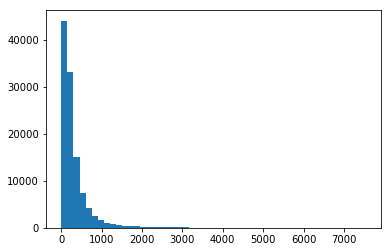

In [10]:
in_degrees = actor_network.indegree()
dd = actor_network.degree_distribution(mode="IN")
plt.hist(in_degrees,bins=50)

In [18]:
print(dd)

N = 113046, mean +- sd: 313.7181 +- 400.1456
Each * represents 6 items
[   1,    2): ********* (59)
[   2,    3): ************ (77)
[   3,    4): ************** (87)
[   4,    5): *************** (90)
[   5,    6): ************** (88)
[   6,    7): **************** (98)
[   7,    8): ********** (64)
[   8,    9): **************** (97)
[   9,   10): ****************** (108)
[  10,   11): ********************** (137)
[  11,   12): ******************* (115)
[  12,   13): ************************ (144)
[  13,   14): ************************ (146)
[  14,   15): ********************** (134)
[  15,   16): ***************************** (174)
[  16,   17): ********************** (136)
[  17,   18): ************************* (154)
[  18,   19): ****************************** (181)
[  19,   20): ****************************** (181)
[  20,   21): ***************************** (176)
[  21,   22): ******************************* (188)
[  22,   23): *************************** (162)
[  23,   24): ***

[7537, 7538):  (1)


### PART 1 QUESTION 3

In [41]:
# function to find actor pairings
names = ["Cruise,_Tom", "Watson,_Emma_(II)", "Clooney,_George", "Hanks,_Tom", "Johnson,_Dwayne_(I)", "Depp,_Johnny", "Smith,_Will_(I)", "Streep,_Meryl", "DiCaprio,_Leonardo", "Pitt,_Brad"]

def actor_pairings(actor_network,name):
    neighbors_of_actor = actor_network.neighbors(name,mode='OUT')
    max_edge_weight = 0
    max_neighbor = None
    for neighbor in neighbors_of_actor:
        edge_weight = actor_network[name,neighbor]
        if edge_weight > max_edge_weight:
            max_edge_weight = edge_weight
            max_neighbor = actor_network.vs['name'][neighbor]
    
    return max_neighbor, max_edge_weight

for name in names:
    preferred_actor,edge_weight = actor_pairings(actor_network,name)
    
    '''
    split_name = name.split('_')[::-1][:-1]
    if split_name[0][0] == "(":
        split_name = split_name[1:].append(split_name[0])
    
    formatted_name = ' '.join(split_name)
    
    preferred_name = join(preferred_actor.split('_')[::-1])[:-1]
    if formatted_name[0] == "(":
        formatted_name 
    preferred_name = ' '.join(preferred_actor.split('_')[::-1])[:-1]
    '''
    formatted_name = name.replace('_', ' ')
    preferred_name = preferred_actor.replace('_', ' ')
    print(f'{formatted_name} prefers to work most with {preferred_name}. The weight of the edge between them is {edge_weight}\n')
    
    

Cruise, Tom prefers to work most with Kidman, Nicole. The weight of the edge between them is 0.1746031746031746

Watson, Emma (II) prefers to work most with Radcliffe, Daniel. The weight of the edge between them is 0.52

Clooney, George prefers to work most with Damon, Matt. The weight of the edge between them is 0.11940298507462686

Hanks, Tom prefers to work most with Allen, Tim (I). The weight of the edge between them is 0.10126582278481013

Johnson, Dwayne (I) prefers to work most with Austin, Steve (IV). The weight of the edge between them is 0.20512820512820512

Depp, Johnny prefers to work most with Bonham Carter, Helena. The weight of the edge between them is 0.08163265306122448

Smith, Will (I) prefers to work most with Foster, Darrell. The weight of the edge between them is 0.12244897959183673

Streep, Meryl prefers to work most with De Niro, Robert. The weight of the edge between them is 0.061855670103092786

DiCaprio, Leonardo prefers to work most with Scorsese, Martin. The

### PART 1 QUESTION 4

In [43]:
import time

start_time = time.time()
page_ranks = actor_network.pagerank()
end_time = time.time()

print(f"Page rank took {end_time - start_time:.2f} seconds")



Page rank took 4486.09 seconds


In [60]:
sorted(page_ranks, reverse=True)

[0.00010736359834186459,
 0.00010241963902503361,
 0.00010206177167015639,
 9.785253186646917e-05,
 9.439168007792035e-05,
 8.950177618191633e-05,
 8.938070649284444e-05,
 8.644799602713579e-05,
 8.596285981366681e-05,
 8.426781330577979e-05,
 8.27990144201223e-05,
 8.17133862399042e-05,
 8.165499217079946e-05,
 8.126248291642744e-05,
 7.855273764517621e-05,
 7.809423873414792e-05,
 7.72743874108175e-05,
 7.711741604715746e-05,
 7.700071848027094e-05,
 7.668175420476247e-05,
 7.61427392970064e-05,
 7.513213498190061e-05,
 7.498273020958416e-05,
 7.422297468089682e-05,
 7.264115106837249e-05,
 7.152683615867264e-05,
 7.083140391335083e-05,
 7.06299793635527e-05,
 7.01804383151074e-05,
 7.002146531354006e-05,
 6.978956344903723e-05,
 6.902419805666877e-05,
 6.899073838899501e-05,
 6.868555507488795e-05,
 6.786152124377586e-05,
 6.765105457859786e-05,
 6.747163977650965e-05,
 6.713876381610507e-05,
 6.693932389207873e-05,
 6.641768977798069e-05,
 6.633416898068192e-05,
 6.611540678197192e

In [62]:
sorted_vertices_by_page_rank = sorted(list(range(113046)), key = lambda x: page_ranks[x],reverse=True)
sorted_vertices_by_page_rank

#Get top 10

for i in sorted_vertices_by_page_rank[:10]:
    name = actor_network.vs[i]["name"]
    true_name = name.replace("_", " ")
    in_degree = actor_network.indegree(name)
    print(f'{true_name} played in {len(actor_actress_dict[true_name])} movies with an indegree of {in_degree} and has a PageRank of {page_ranks[i]}')

Roberts, Eric (I) played in 298 movies with an indegree of 3552 and has a PageRank of 0.00010736359834186459
Tatasciore, Fred played in 353 movies with an indegree of 3954 and has a PageRank of 0.00010241963902503361
Jeremy, Ron played in 637 movies with an indegree of 2905 and has a PageRank of 0.00010206177167015639
Trejo, Danny played in 241 movies with an indegree of 3498 and has a PageRank of 9.785253186646917e-05
Flowers, Bess played in 828 movies with an indegree of 7537 and has a PageRank of 9.439168007792035e-05
Hitler, Adolf played in 379 movies with an indegree of 3851 and has a PageRank of 8.950177618191633e-05
Jackson, Samuel L. played in 156 movies with an indegree of 3448 and has a PageRank of 8.938070649284444e-05
Harris, Sam (II) played in 600 movies with an indegree of 6960 and has a PageRank of 8.644799602713579e-05
Blum, Steve (IX) played in 373 movies with an indegree of 3315 and has a PageRank of 8.596285981366681e-05
Riehle, Richard played in 197 movies with an i

### PART 1 QUESTION 5

In [64]:
for name in names:
    vertex_id = actor_network.vs.find(name).index
    pagerank_score = page_ranks[vertex_id]
    number_of_movies = len(actor_actress_dict[name.replace('_', ' ')])
    true_name = name.replace('_', ' ')
    in_degree = actor_network.indegree(name)
    print(f"{true_name} has a PageRank Score of {pagerank_score}, played in {number_of_movies} movies and has an in-degree of {in_degree}.\n")

Cruise, Tom has a PageRank Score of 4.307030058300693e-05, played in 63 movies and has an in-degree of 1651.

Watson, Emma (II) has a PageRank Score of 1.359424142896732e-05, played in 25 movies and has an in-degree of 453.

Clooney, George has a PageRank Score of 4.176423660360577e-05, played in 67 movies and has an in-degree of 1572.

Hanks, Tom has a PageRank Score of 5.188566664627771e-05, played in 79 movies and has an in-degree of 2064.

Johnson, Dwayne (I) has a PageRank Score of 3.803697844080298e-05, played in 78 movies and has an in-degree of 1357.

Depp, Johnny has a PageRank Score of 5.577335567419451e-05, played in 98 movies and has an in-degree of 2144.

Smith, Will (I) has a PageRank Score of 3.491168272904619e-05, played in 49 movies and has an in-degree of 1319.

Streep, Meryl has a PageRank Score of 4.139456431964662e-05, played in 97 movies and has an in-degree of 1594.

DiCaprio, Leonardo has a PageRank Score of 3.486898801646825e-05, played in 49 movies and has an 

In [49]:
actor_network = Graph(directed=True)
for i,j in tqdm(actor_actress_dict.items()):
    if actor_network.vcount() == 0 or i not in actor_network.vs['name']:
        actor_network.add_vertex(i)
    common_movies_dict = {}
    for movie in j:
        for actor in movies_dict[movie]:
            if actor not in common_movies_dict:
                common_movies_dict[actor] = 1
            else:
                common_movies_dict[actor] += 1
    for j in common_movies_dict:
        if j != i:
            if actor_network.vcount() == 0 or j not in actor_network.vs['name']:
                actor_network.add_vertex(j)
            number_of_common_movies = common_movies_dict[j]
            number_of_movies_i = len(actor_actress_dict[i])
            weight = number_of_common_movies/ number_of_movies_i
            actor_network.add_edge(source=i,target=j,weight=weight)

  0%|▏                                                                         | 192/113125 [06:40<65:23:09,  2.08s/it]

KeyboardInterrupt: 

In [22]:
g = Graph(directed=True)
g.add_vertex("hello")
g.add_vertex("there")
g.add_edge("hello", "there",weight=3)

In [23]:
g['hello','there']
g.indegree()

[0, 1]

In [20]:
actor_network.vs.find("Pitt,_Brad").

igraph.Vertex(<igraph.Graph object at 0x000001FA972704F8>, 24905, {'name': 'Pitt,_Brad'})

In [27]:
g['there', 'hello']

0

In [ ]:
g.neighbors('hello',mode='OUT')

In [31]:
g.vs['name'][1]

'there'

In [65]:
actor_pairings(actor_network, "Hanks,_Tom")

('Allen,_Tim_(I)', 0.10126582278481013)